In [108]:
import pandas as pd
import numpy as np
import os
'''
import plotly.plotly as py
import plotly.graph_objs as go
'''
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected=True)

In [109]:
# Make directory to store images
if not os.path.exists('images'):
    os.mkdir('images')

In [68]:
# Create a noisey time series sampled from a normal distribution of mean = 0 and standard deviation = 3
num_points = 100
x_np_array = np.arange(num_points)
y_np_array = np.random.normal(size = num_points)#, scale = 3)

raw_data_df = pd.DataFrame({'y':y_np_array, 'x':x_np_array})
data = [go.Scatter(
    x = raw_data_df['x'],
    y = raw_data_df['y']
    )]

layout2 = go.Layout(
    title = 'Plot of random simulated time series',
    xaxis = dict(
        title='Data index'),
    yaxis = dict(
        title='Data output')
    )

iplot({'data':data,'layout':layout2})# = layout2)


In [16]:
# Create the FWHM (Full Width Half Maximum) transforms. Note: these two functions are derived from the relation between 
# the amount of variation (distance between the two points on distribution where density is equal to half of the 
# density at the mode.

def sd_fwhm(sd):
    return sd*np.sqrt(8*np.log(2))

def fwhm_sd(fwhm):
    return fwhm/np.sqrt(8*np.log(2))

In [104]:
# Set the bandwidth of the kernel smoother. Note: decreasing this value will reduce the amount of smoothing
FWHM = 4


# Create function to calculate different values for various bandwiths
def calc_smoothed_values(FWHM):
    sd = fwhm_sd(FWHM)

    stored_smooth_values_FWHM = np.zeros(num_points)
    for x_val in x_np_array: 
        #print(x_val)
        kernel_weights = np.exp(-(x_np_array-x_val)**2/(2*sd**2))
        # Normalise the kernel weights
        kernel_weights = kernel_weights/sum(kernel_weights)
        # Multiply the kernel weights by actaul values i.e. taking a weighted average of the data points
        stored_smooth_values_FWHM[x_val] = sum(y_np_array*kernel_weights)
    return pd.DataFrame({'y':stored_smooth_values_FWHM, 'x':x_np_array})

In [105]:
# Use functions to calculate the smoothed data values
smoothed_data_FHWM_4_df = calc_smoothed_values(4)
smoothed_data_FHWM_2_df = calc_smoothed_values(2)


In [106]:
# Plot the raw and smoothed values from the kernel
data = [
    # Raw data
    go.Scatter(
    x = raw_data_df['x'],
    y = raw_data_df['y'], 
    name = 'Raw simulated data'
    ), 
    go.Scatter(
    x = smoothed_data_FHWM_2_df['x'],
    y = smoothed_data_FHWM_2_df['y'],
    name = 'Smoothed data (FHWM = 2)'
    ), 
    # Smoothed data with FHWM = 4
    go.Scatter(
    x = smoothed_data_FHWM_4_df['x'],
    y = smoothed_data_FHWM_4_df['y'],
    name = 'Smoothed data (FHWM = 4)'
    )]

layout2 = go.Layout(
    title = 'Plot of random simulated time series',
    xaxis = dict(
        title='Data index'),
    yaxis = dict(
        title='Data output')
    )

iplot({'data':data,'layout':layout2})# = layout2)

In [ ]:
# Write figure to the 'images' file

data = [
    # Raw data
    go.Scatter(
    x = raw_data_df['x'],
    y = raw_data_df['y'], 
    name = 'Raw simulated data'
    ), 
    go.Scatter(
    x = smoothed_data_FHWM_2_df['x'],
    y = smoothed_data_FHWM_2_df['y'],
    name = 'Smoothed data (FHWM = 2)'
    ), 
    # Smoothed data with FHWM = 4
    go.Scatter(
    x = smoothed_data_FHWM_4_df['x'],
    y = smoothed_data_FHWM_4_df['y'],
    name = 'Smoothed data (FHWM = 4)'
    )]

layout2 = go.Layout(
    title = 'Plot of random simulated time series',
    xaxis = dict(
        title='Data index'),
    yaxis = dict(
        title='Data output')
    )

pio.write_image(fig, 'images/fig1.png')

## Gaussian Smoothing for image processing
-Notes: 

    1. Gaussian smoothing is also called Gaussian blur(ring).
    2. A result of Gaussian smoothing is a low pass filter i.e. high frequency noise is removed.
    
    WHY: edge detection can be more accurate with denoised images (lower variation amongst pixels.
    
    In image processing a 2D convolution is also referred to as a kernel where the weights sum to unity. 
 
     Must ensure kernel sums to 1 else we risk adding energy to the image

In [315]:
# Load dependencies and set appropriate parameters
import scipy.misc
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
from numpy import linalg as LA

# Set matplotlib to be inline
%matplotlib inline

SIGMA_2D = 2
Gaussian_kernel_dim = 5
Gaussian_kernel_dim_mid = (Gaussian_kernel_dim/2) + (1/2)
Neg_offset = -(int(Gaussian_kernel_dim_mid - 1))
Pos_offset = (int(Gaussian_kernel_dim_mid)) 



IMAGE_NAME = "images/Feynman_noisey_2"

In [321]:
def convert_image_to_greyscale(image_name):
    '''
    Takes a string as a reference to a colour image and converts to greyscale saving with the suffix
    '_greyscale.png'.
    :param image_name: a string which is the name of the image which is to be converted to grey scale.
    '''
    img = Image.open(image_name + '.jpg').convert('LA')
    img.save(image_name + '_greyscale.png')

def  convolve_image_with_kernel(image_rows, num_row_pad, num_col_pad, Neg_offset, Pos_offset, kernel_weights):
    # Iterate through the padded matrix 'image_padded'
    for i in range(num_row_pad, image_rows - num_row_pad):
        for j in range(num_col_pad, image_cols_padded - num_col_pad): 
            # 1. convolve 5x5 square with Gaussian kernel weights -> return scalar. 
            image_elementwise_multiplication = image_padded[i+Neg_offset:i+Pos_offset,j+Neg_offset:j+Pos_offset] * kernel_weights
            smoothed_pixel_value = image_elementwise_multiplication.sum()
            # 2. Update scalar output of convolution into the value of image matrix.
            image_padded[i,j] = smoothed_pixel_value
    
    return image_padded

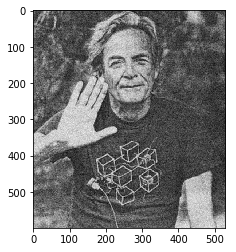

In [313]:
# Read in image and pad image with needed zeros
# NOTE: using scipy.mics.imread with parameter flatten = True reads in the grey scale image
image_num1 = scipy.misc.imread("images/Feynman_noisey_2.jpg", flatten = True)


convert_image_to_greyscale("images/Feynman_noisey_2")
image_matrix = plt.imread(IMAGE_NAME + '_greyscale.png')

# Get image dimensions to convolve over.
image_rows_raw = image_num1.shape[0]
image_cols_raw = image_num1[0].shape[0]


# Create random noise matrix
random_noise = np.random.normal(0,15,(image_rows_raw,image_cols_raw))

image_num1 = image_num1 + random_noise

# Note by default 'imshow' will not produce a grayscale image, instead it will return a green image. 
# By default the image used is a heatmap, called vidris.
imshow(image_num1, cmap = 'gray')

In [159]:
# Add Gaussian noise to the image and save

# NOT needed    
                                

43.44929946408743
[[  0.79580168   3.56653569   5.88022325   3.56653569   0.79580168]
 [  3.56653569  15.98410401  26.35333227  15.98410401   3.56653569]
 [  5.88022325  26.35333227  43.44929946  26.35333227   5.88022325]
 [  3.56653569  15.98410401  26.35333227  15.98410401   3.56653569]
 [  0.79580168   3.56653569   5.88022325   3.56653569   0.79580168]]


In [316]:
# Create Gaussian kernel
#Initialise a matrix for weights of the kernel
kernel_weights = np.zeros((Gaussian_kernel_dim, Gaussian_kernel_dim))




if Gaussian_kernel_dim % 2 == 1: 
    Gaussian_weight_index = [np.abs(x + 1 - Gaussian_kernel_dim_mid) for x in range(Gaussian_kernel_dim)]
else:
    print("Use a Gaussian_kernel_dim with an odd number")

    
    
    
# Update code to achieve calculation in vectorised form
for i, Gwi_i in enumerate(Gaussian_weight_index):
    for j, Gwi_j in enumerate(Gaussian_weight_index): 
        #print(Gwi_i)
        kernel_weights[i,j] = np.exp(-(Gwi_i ** 2 + Gwi_j ** 2)/(2 * SIGMA_2D ** 2)) / (2 * np.pi * SIGMA_2D ** 2)
     
    
    
print("Kernel weights used to convolve against the image.")
print(kernel_weights * 273)
                                 

Kernel weights used to convolve against the image.
[[  3.996026     5.81418352   6.58833307   5.81418352   3.996026  ]
 [  5.81418352   8.45958711   9.58596805   8.45958711   5.81418352]
 [  6.58833307   9.58596805  10.86232487   9.58596805   6.58833307]
 [  5.81418352   8.45958711   9.58596805   8.45958711   5.81418352]
 [  3.996026     5.81418352   6.58833307   5.81418352   3.996026  ]]


In [318]:
# Use np.pad to ensure we can convolve the edge pixels with our Gaussian kernel
image_padded= np.pad(image_num1,(2,2), 'constant', constant_values = (0,0))

# Get image dimensions to convolve over.
image_rows_padded = image_padded.shape[0]
image_cols_padded = image_padded[0].shape[0]

smoothed_image = convolve_image_with_kernel()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[   0.            0.            0.            0.            0.        ]
 [   0.           77.52600788   71.66834992   98.51284989  110.17595474]
 [   0.           49.78055906   97.05171679  107.88283621  133.76721799]
 [   0.          111.47803322   86.56017401  152.13971082  129.72810384]
 [   0.          103.60260025  127.09991738  132.44326788  137.76271505]]
47.0259839969


47.025983996942507

In [319]:
        # Calculate convolution of image and Gaussian kernel
    
    # Use np.pad to ensure we can convolve the edge pixels with our Gaussian kernel
image_padded = np.pad(image_num1,(2,2), 'constant', constant_values = (0,0))

def  convolve_image_with_kernel(image_rows,):
    # Iterate through the padded matrix 'image_padded'
    for i in range(num_row_pad,image_rows-num_row_pad):
        for j in range(2,image_cols_padded-2): 
            # 1. convolve 5x5 square with Gaussian kernel weights -> return scalar. 
            image_elementwise_multiplication = image_padded[i+Neg_offset:i+Pos_offset,j+Neg_offset:j+Pos_offset] * kernel_weights
            smoothed_pixel_value = image_elementwise_multiplication.sum()
            # 2. Update scalar output of convolution into the value of image matrix.
            image_padded[i,j] = smoothed_pixel_value


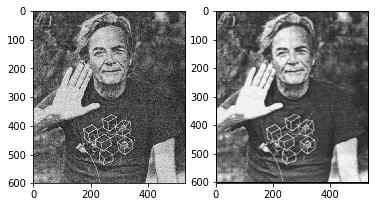

In [320]:
# Display and save image 
# Display the image from the above convolution

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image_num1, cmap ='gray')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(image_padded, cmap = 'gray')